In [1]:
import numpy as np
import pandas as pd
import torch
from torchvision import transforms
from torch import nn
import torchvision.models as models
import os
import glob as glob
from PIL import Image
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('./insect')

['train', 'vad']

#由于该数据符合ImageFolder的读取形式，故可以直接进行读取
#先试用ImageFolder形式读取数据，再把读取到的数据存在dataloder生成器中

In [123]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.RandomRotation((-45,45)), #随机旋转
    transforms.ToTensor()
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.229, 0.224, 0.225)), #R,G,B每层的归一化用到的均值和方差
])

train_folder = ImageFolder('./insect/train',transform = transform)
test_folder = ImageFolder('./insect/vad',transform = transform)
#存进dataloder中
train_dataloader = torch.utils.data.DataLoader(train_folder, batch_size=8, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_folder,batch_size=8,shuffle=True)

In [124]:
train_folder

Dataset ImageFolder
    Number of datapoints: 1466
    Root Location: ./insect/train
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                             RandomHorizontalFlip(p=0.5)
                             RandomRotation(degrees=(-45, 45), resample=False, expand=False)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [125]:
len(train_dataloader)

184

In [126]:
i = 0
for batch_idx, (inputs_, labels_) in enumerate(train_dataloader):    
    print(batch_idx,'b:',len(inputs_))
    print(len(inputs_))
    print(labels)
    break
    
print(i)

0 b: 8
8
tensor([1, 2, 1, 2, 4, 5, 2, 5])
0


In [127]:
train_dataloader

In [128]:
images, labels = next(iter(train_dataloader))
print(images)#一次迭代会有8个图片
print(labels)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

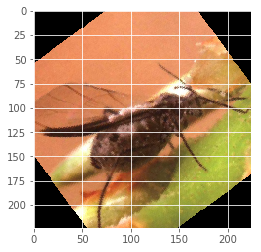

In [129]:
#pytorch的datalloader中的图片要想画出来有以下两种方法



# 方法1：plt.imshow(ndarray)
img = images[0]      # plt.imshow()只能接受3-D Tensor，所以也要用image[0]消去batch那一维
img = img.numpy()   # FloatTensor转为ndarray
img = np.transpose(img, (1,2,0))    # 把channel那一维放到最后

# 显示图片
plt.imshow(img)
plt.show()




In [130]:
# 方法1：Image.show()
# transforms.ToPILImage()中有一句
# npimg = np.transpose(pic.numpy(), (1, 2, 0))
# 因此pic只能是3-D Tensor，所以要用image[0]消去batch那一维
#img = to_pil_image(images[0])

'''
不过好像有点问题
img = transforms.ToPILImage(images[0])
img.show()
'''

'\n不过好像有点问题\nimg = transforms.ToPILImage(images[0])\nimg.show()\n'

In [131]:
model = models.densenet169(pretrained=True)

In [132]:
model = models.densenet169(pretrained=True)

In [133]:
###num_ftrs = model_ft.fc.in_features
num_ftrs = model.classifier.in_features
###model_ft.fc = nn.Linear(num_ftrs, 8)
model.classifier = nn.Linear(num_ftrs, 8)

model.cuda()

#loss function and optimizer
criterion=torch.nn.CrossEntropyLoss()
#parameters only train the last fc layer
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [134]:
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [135]:
def trainmodel(model,train_loader,optimizer, epoch):
    model.train()
    for batch_idx, (inputs_, labels_) in enumerate(train_loader):        
        cuda = torch.device('cuda') 
        #直接用torch.tensor会有warning
        inputs = torch.tensor(inputs_).cuda()
        labels = torch.tensor(labels_).cuda()
        
        optimizer.zero_grad()
        output = model(inputs)
        
        #loss = F.nll_loss(output, target)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        if(batch_idx+1)%30 == 0: 
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(inputs), len(train_loader)*len(inputs_),
                100. * batch_idx / len(train_loader), loss.item()))
    

In [136]:
accuracy = []
def testmodel(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            
            cuda = torch.device('cuda') 
            #这样有warning
            data = torch.tensor(inputs).cuda()
            target = torch.tensor(labels).cuda()
            #data = inputs.clone().detach().requires_grad_(True)
            #target = labels.clone().detach
            
            
            #device = torch.device("cuda")
            #data, target = data.to(device), target.to(device)
            #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            
            #data, target = data.to(device), target.to(device)
            #data, target = data.cpu(), target.cpu()
            
            output = model(data)
            test_loss += criterion(output, target).item() # 将一批的损失相加
            pred = output.max(1, keepdim=True)[1] # 找到概率最大的下标
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy.append(100. * correct / (len(inputs)*len(test_loader)))
    if 100. * correct / (len(inputs)*len(test_loader)) >= max(accuracy):
        torch.save(model.state_dict,'Densenet_insect_parameters.pkl')
    test_loss /= len(inputs)*len(test_loader)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader)*len(inputs),
        100. * correct / (len(test_loader)*len(inputs))))

In [137]:
#开始训练过程
EPOCHS = 100
import warnings
warnings.filterwarnings('ignore')
#注意batchsize和Dataloder中的butchsize要一致
for epoch in range(1, EPOCHS + 1):
    trainmodel(model, train_dataloader,optimizer, epoch)
    testmodel(model,test_dataloader)

Train Epoch: 1 [232/1472 (16%)]	Loss: 1.343580
Train Epoch: 1 [472/1472 (32%)]	Loss: 1.346192
Train Epoch: 1 [712/1472 (48%)]	Loss: 1.879104
Train Epoch: 1 [952/1472 (65%)]	Loss: 1.288170
Train Epoch: 1 [1192/1472 (81%)]	Loss: 1.241630
Train Epoch: 1 [1432/1472 (97%)]	Loss: 0.930972

Test set: Average loss: 3.5445, Accuracy: 34/140 (24%)

Train Epoch: 2 [232/1472 (16%)]	Loss: 1.313828
Train Epoch: 2 [472/1472 (32%)]	Loss: 1.977656
Train Epoch: 2 [712/1472 (48%)]	Loss: 0.861529
Train Epoch: 2 [952/1472 (65%)]	Loss: 1.247221
Train Epoch: 2 [1192/1472 (81%)]	Loss: 1.115689
Train Epoch: 2 [1432/1472 (97%)]	Loss: 1.867712

Test set: Average loss: 0.2139, Accuracy: 73/140 (52%)

Train Epoch: 3 [232/1472 (16%)]	Loss: 1.407938
Train Epoch: 3 [472/1472 (32%)]	Loss: 1.318164
Train Epoch: 3 [712/1472 (48%)]	Loss: 1.672128
Train Epoch: 3 [952/1472 (65%)]	Loss: 0.987064
Train Epoch: 3 [1192/1472 (81%)]	Loss: 1.302760
Train Epoch: 3 [1432/1472 (97%)]	Loss: 1.220376

Test set: Average loss: 0.2085, A


Test set: Average loss: 0.1673, Accuracy: 97/140 (69%)

Train Epoch: 25 [232/1472 (16%)]	Loss: 1.170771
Train Epoch: 25 [472/1472 (32%)]	Loss: 2.256133
Train Epoch: 25 [712/1472 (48%)]	Loss: 1.105435
Train Epoch: 25 [952/1472 (65%)]	Loss: 1.074777
Train Epoch: 25 [1192/1472 (81%)]	Loss: 1.245178
Train Epoch: 25 [1432/1472 (97%)]	Loss: 0.969797

Test set: Average loss: 0.1734, Accuracy: 88/140 (63%)

Train Epoch: 26 [232/1472 (16%)]	Loss: 1.557821
Train Epoch: 26 [472/1472 (32%)]	Loss: 1.133021
Train Epoch: 26 [712/1472 (48%)]	Loss: 1.123886
Train Epoch: 26 [952/1472 (65%)]	Loss: 0.973045
Train Epoch: 26 [1192/1472 (81%)]	Loss: 1.312902
Train Epoch: 26 [1432/1472 (97%)]	Loss: 0.922484

Test set: Average loss: 0.1616, Accuracy: 98/140 (70%)

Train Epoch: 27 [232/1472 (16%)]	Loss: 0.810442
Train Epoch: 27 [472/1472 (32%)]	Loss: 1.678346
Train Epoch: 27 [712/1472 (48%)]	Loss: 0.904253
Train Epoch: 27 [952/1472 (65%)]	Loss: 1.024854
Train Epoch: 27 [1192/1472 (81%)]	Loss: 0.516712
Train Ep

Train Epoch: 48 [952/1472 (65%)]	Loss: 1.202998
Train Epoch: 48 [1192/1472 (81%)]	Loss: 0.940238
Train Epoch: 48 [1432/1472 (97%)]	Loss: 0.665370

Test set: Average loss: 0.1548, Accuracy: 107/140 (76%)

Train Epoch: 49 [232/1472 (16%)]	Loss: 0.327798
Train Epoch: 49 [472/1472 (32%)]	Loss: 0.275720
Train Epoch: 49 [712/1472 (48%)]	Loss: 0.243211
Train Epoch: 49 [952/1472 (65%)]	Loss: 0.147542
Train Epoch: 49 [1192/1472 (81%)]	Loss: 0.684657
Train Epoch: 49 [1432/1472 (97%)]	Loss: 0.652593

Test set: Average loss: 0.1543, Accuracy: 107/140 (76%)

Train Epoch: 50 [232/1472 (16%)]	Loss: 1.103377
Train Epoch: 50 [472/1472 (32%)]	Loss: 0.834551
Train Epoch: 50 [712/1472 (48%)]	Loss: 0.505232
Train Epoch: 50 [952/1472 (65%)]	Loss: 0.364067
Train Epoch: 50 [1192/1472 (81%)]	Loss: 0.821289
Train Epoch: 50 [1432/1472 (97%)]	Loss: 0.707614

Test set: Average loss: 0.1297, Accuracy: 114/140 (81%)

Train Epoch: 51 [232/1472 (16%)]	Loss: 0.234444
Train Epoch: 51 [472/1472 (32%)]	Loss: 0.416581
Trai

Train Epoch: 72 [232/1472 (16%)]	Loss: 0.112960
Train Epoch: 72 [472/1472 (32%)]	Loss: 0.099036
Train Epoch: 72 [712/1472 (48%)]	Loss: 0.555406
Train Epoch: 72 [952/1472 (65%)]	Loss: 0.153771
Train Epoch: 72 [1192/1472 (81%)]	Loss: 0.070086
Train Epoch: 72 [1432/1472 (97%)]	Loss: 1.009478

Test set: Average loss: 0.1584, Accuracy: 115/140 (82%)

Train Epoch: 73 [232/1472 (16%)]	Loss: 0.300058
Train Epoch: 73 [472/1472 (32%)]	Loss: 0.192878
Train Epoch: 73 [712/1472 (48%)]	Loss: 0.182917
Train Epoch: 73 [952/1472 (65%)]	Loss: 0.219374
Train Epoch: 73 [1192/1472 (81%)]	Loss: 0.278452
Train Epoch: 73 [1432/1472 (97%)]	Loss: 0.314789

Test set: Average loss: 0.1551, Accuracy: 116/140 (83%)

Train Epoch: 74 [232/1472 (16%)]	Loss: 0.053595
Train Epoch: 74 [472/1472 (32%)]	Loss: 0.506398
Train Epoch: 74 [712/1472 (48%)]	Loss: 0.055808
Train Epoch: 74 [952/1472 (65%)]	Loss: 0.578637
Train Epoch: 74 [1192/1472 (81%)]	Loss: 0.050513
Train Epoch: 74 [1432/1472 (97%)]	Loss: 0.142956

Test set: Ave

Train Epoch: 95 [1192/1472 (81%)]	Loss: 0.052941
Train Epoch: 95 [1432/1472 (97%)]	Loss: 0.896162

Test set: Average loss: 0.1968, Accuracy: 116/140 (83%)

Train Epoch: 96 [232/1472 (16%)]	Loss: 0.117662
Train Epoch: 96 [472/1472 (32%)]	Loss: 0.058132
Train Epoch: 96 [712/1472 (48%)]	Loss: 0.211460
Train Epoch: 96 [952/1472 (65%)]	Loss: 0.324310
Train Epoch: 96 [1192/1472 (81%)]	Loss: 0.224723
Train Epoch: 96 [1432/1472 (97%)]	Loss: 0.081163

Test set: Average loss: 0.1998, Accuracy: 108/140 (77%)

Train Epoch: 97 [232/1472 (16%)]	Loss: 0.025068
Train Epoch: 97 [472/1472 (32%)]	Loss: 0.076903
Train Epoch: 97 [712/1472 (48%)]	Loss: 0.713913
Train Epoch: 97 [952/1472 (65%)]	Loss: 0.424157
Train Epoch: 97 [1192/1472 (81%)]	Loss: 0.136008
Train Epoch: 97 [1432/1472 (97%)]	Loss: 0.243726

Test set: Average loss: 0.1584, Accuracy: 110/140 (79%)

Train Epoch: 98 [232/1472 (16%)]	Loss: 0.116212
Train Epoch: 98 [472/1472 (32%)]	Loss: 0.030968
Train Epoch: 98 [712/1472 (48%)]	Loss: 0.037979
Trai

Text(0,0.5,'accuracy')

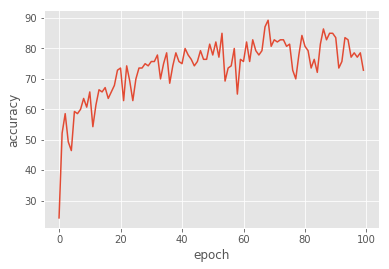

In [138]:
#画出准确率随着epoch的变化而变化的图
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(range(0,100),accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')